In [1]:
%cd "D:\School\Graduate 2022 Summer\ROAR CSV\ROAR CSV"

D:\School\Graduate 2022 Summer\ROAR CSV\ROAR CSV


In [2]:
pwd()

'D:\\School\\Graduate 2022 Summer\\ROAR CSV\\ROAR CSV'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
df = pd.read_csv('SimData_2022.06.09_11.43.06.csv.roar.csv',
                parse_dates = {'datetime': ['date', 'time']},
                low_memory=False)
df2 = df[['datetime',
          'latitude',
          'longitude', 
          'absoluteAltitude', 
          'trueHeading', 
          'groundSpeed', 
          'trueAirspeed', 
          'climbOrDescentRate', 
          'hasWeightOnWheels', 
          'turnRate to degPerSec', 
          'cyclicPositionPitch', 
          'cyclicPositionRoll', 
          'collectivePosition', 
          'antiTorquePedalPosition', 
          'throttlePosition', 
          'e1Torque', 
          'e2Torque',
]] # only capture columns that relevant into another dataframe

# Convert timestamp into year month day and hour in seconds 
# eliminate the milliseonds part in order to group them by seconds with an average
df2['datetime'] = df2.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


# Group all row by seconds with a average all the datapoint into another dataframe
df3 = df2.groupby(by=["datetime"], dropna=False).mean().reset_index()



C:\Users\david\AppData\Local\Temp\ipykernel_1328\1071953324.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['datetime'] = df2.datetime.dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')


In [78]:
# initalize hover or not, left turn, right turn column
df3['HoverOrNot'] = 0
df3['RighTurn'] = 0
df3['LeftTurn'] = 0

In [79]:
# Assign Hover Or Not based on the log
df3.loc[(df3['datetime'] >= '2022-06-09 15:47:53') & (df3['datetime'] <= '2022-06-09 15:54:27'),['HoverOrNot']] = 10

# Assign right turn based on the log
df3.loc[(df3['datetime'] >= '2022-06-09 15:47:53') & (df3['datetime'] <= '2022-06-09 15:48:19'),['RighTurn']] = 5
df3.loc[(df3['datetime'] >= '2022-06-09 15:48:43') & (df3['datetime'] <= '2022-06-09 15:49:11'),['RighTurn']] = 5
df3.loc[(df3['datetime'] >= '2022-06-09 15:49:57') & (df3['datetime'] <= '2022-06-09 15:50:30'),['RighTurn']] = 5
df3.loc[(df3['datetime'] >= '2022-06-09 15:51:01') & (df3['datetime'] <= '2022-06-09 15:51:23'),['RighTurn']] = 5

# Assign left turn based on the log
df3.loc[(df3['datetime'] >= '2022-06-09 15:52:09') & (df3['datetime'] <= '2022-06-09 15:52:28'),['LeftTurn']] = 8
df3.loc[(df3['datetime'] >= '2022-06-09 15:52:41') & (df3['datetime'] <= '2022-06-09 15:53:07'),['LeftTurn']] = 8
df3.loc[(df3['datetime'] >= '2022-06-09 15:53:27') & (df3['datetime'] <= '2022-06-09 15:53:43'),['LeftTurn']] = 8
df3.loc[(df3['datetime'] >= '2022-06-09 15:54:10') & (df3['datetime'] <= '2022-06-09 15:54:27'),['LeftTurn']] = 8

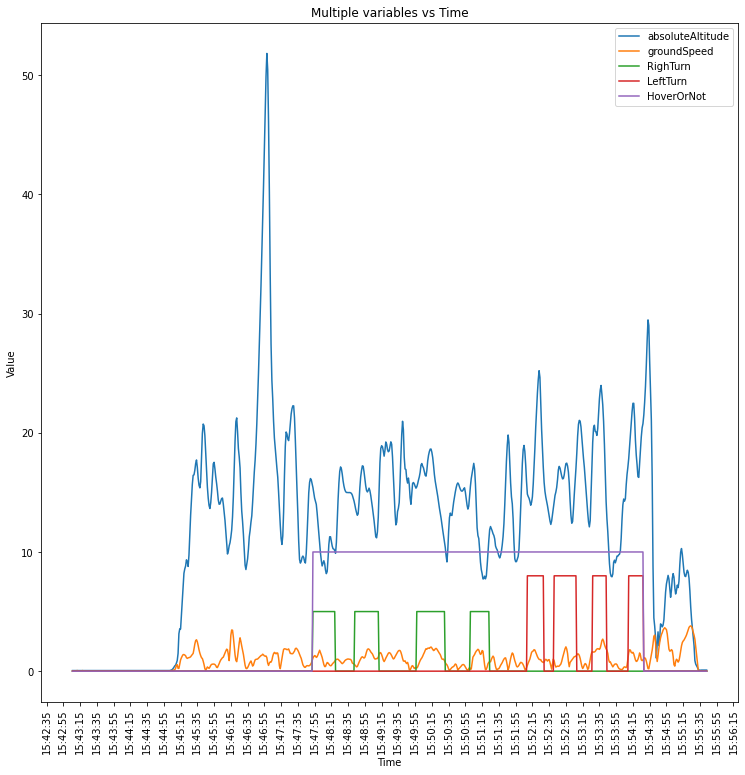

In [100]:
import matplotlib.dates as mdates

plt.figure(figsize=(12.5, 12.5))
plt.plot('datetime','absoluteAltitude',
         data = df3,
         label = "absoluteAltitude")
plt.plot('datetime','groundSpeed',
         data = df3,
         label = "groundSpeed")
plt.plot('datetime','RighTurn',
         data = df3,
         label = "RighTurn")
plt.plot('datetime','LeftTurn',
         data = df3,
         label = "LeftTurn")
# plt.plot('datetime','climbOrDescentRate',
#          data = df3,
#          label = "climbOrDescentRate")
plt.plot('datetime','HoverOrNot',
         data = df3,
         label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=20))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('Multiple variables vs Time')
plt.legend()
plt.show()

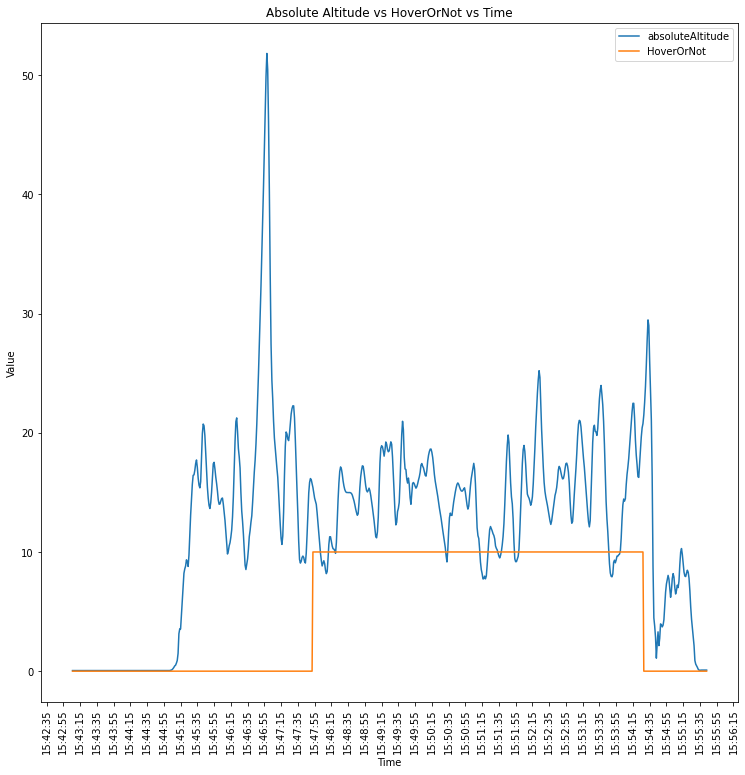

In [103]:
import matplotlib.dates as mdates

plt.figure(figsize=(12.5, 12.5))
plt.plot('datetime','absoluteAltitude',
         data = df3,
         label = "absoluteAltitude")
# plt.plot('datetime','groundSpeed',
#          data = df3,
#          label = "groundSpeed")
# plt.plot('datetime','RighTurn',
#          data = df3,
#          label = "RighTurn")
# plt.plot('datetime','LeftTurn',
#          data = df3,
#          label = "LeftTurn")
# plt.plot('datetime','climbOrDescentRate',
#          data = df3,
#          label = "climbOrDescentRate")
plt.plot('datetime','HoverOrNot',
         data = df3,
         label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=20))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('Absolute Altitude vs HoverOrNot vs Time')
plt.legend()
plt.show()

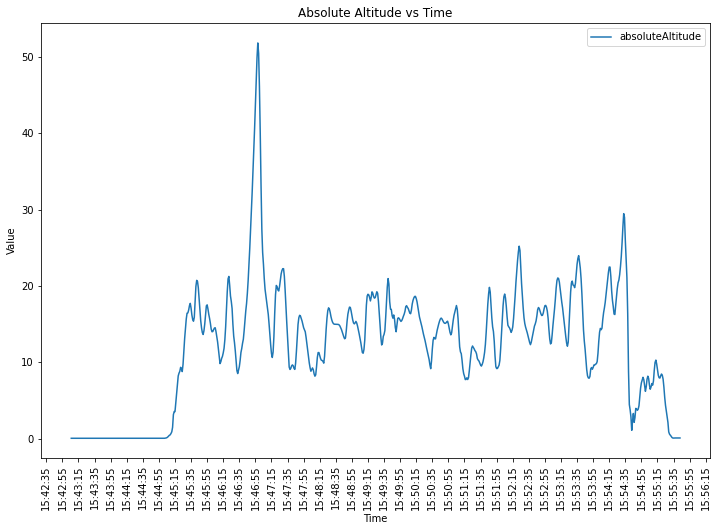

In [106]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))
plt.plot('datetime','absoluteAltitude',
         data = df3,
         label = "absoluteAltitude")
# plt.plot('datetime','groundSpeed',
#          data = df3,
#          label = "groundSpeed")
# plt.plot('datetime','RighTurn',
#          data = df3,
#          label = "RighTurn")
# plt.plot('datetime','LeftTurn',
#          data = df3,
#          label = "LeftTurn")
# plt.plot('datetime','climbOrDescentRate',
#          data = df3,
#          label = "climbOrDescentRate")
# plt.plot('datetime','HoverOrNot',
#          data = df3,
#          label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=20))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('Absolute Altitude vs Time')
plt.legend()
plt.show()

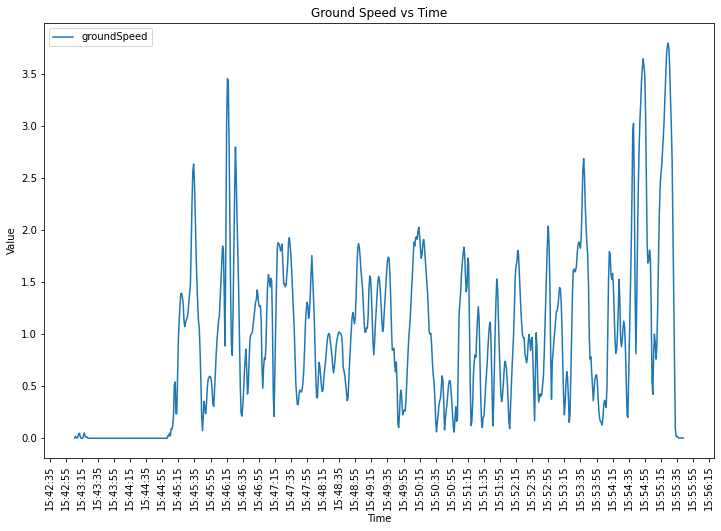

In [107]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))
# plt.plot('datetime','absoluteAltitude',
#          data = df3,
#          label = "absoluteAltitude")
plt.plot('datetime','groundSpeed',
         data = df3,
         label = "groundSpeed")
# plt.plot('datetime','RighTurn',
#          data = df3,
#          label = "RighTurn")
# plt.plot('datetime','LeftTurn',
#          data = df3,
#          label = "LeftTurn")
# plt.plot('datetime','climbOrDescentRate',
#          data = df3,
#          label = "climbOrDescentRate")
# plt.plot('datetime','HoverOrNot',
#          data = df3,
#          label = "HoverOrNot")

#Set format of the plot chart
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=20))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()


plt.xlabel('Time')
plt.ylabel('Value') 
plt.title('Ground Speed vs Time')
plt.legend()
plt.show()